In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy import stats
import statsmodels.api as sm
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM, SVC
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the path to the dataset
file_path = 'Dataset4_EWS.xlsx'


Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


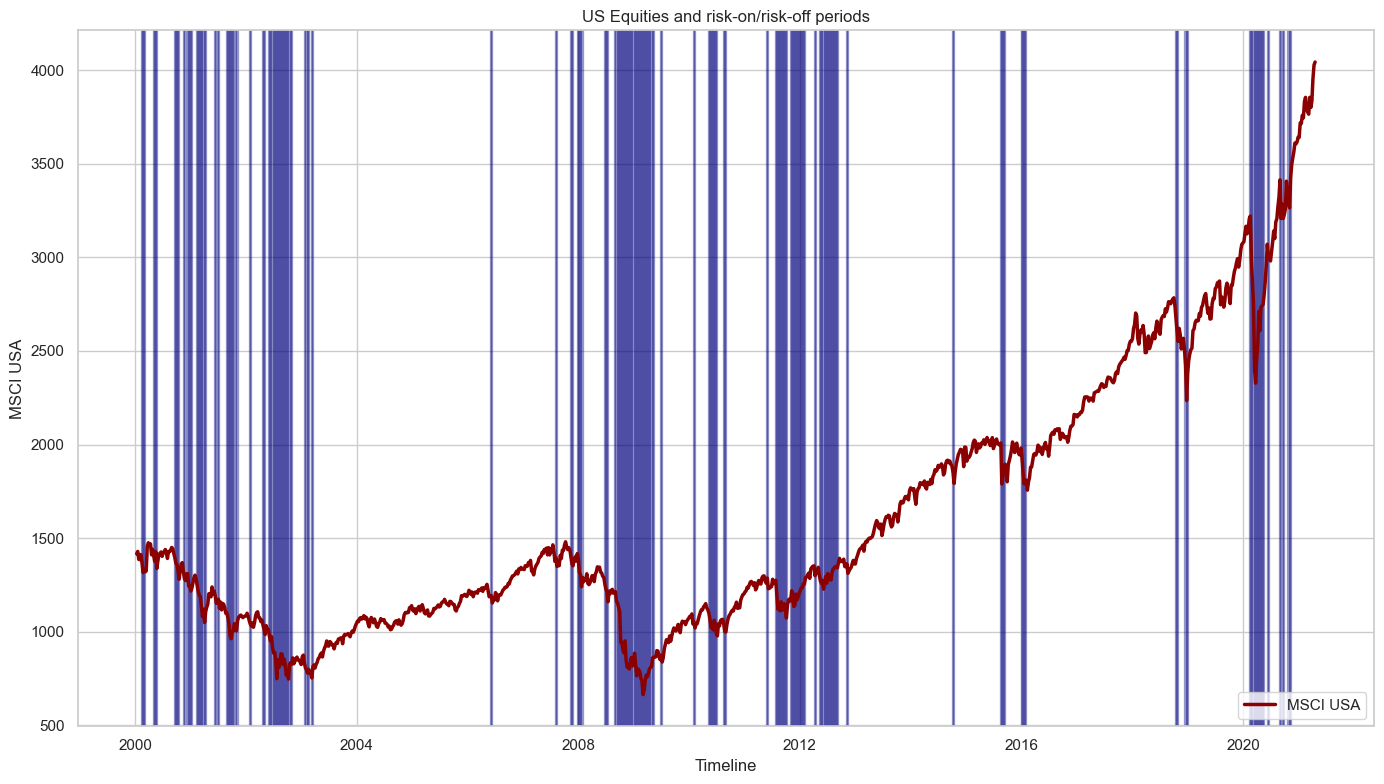

In [3]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(file_path, sheet_name='Markets')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col].values
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


In [4]:
# Make data stationary based on variable type
# So w define lists of variables by type
indices_currencies = [col for col in X_df.columns if col in [
    'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
    'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
    'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
]]

interest_rates = [col for col in X_df.columns if col in [
    'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
    'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
    'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
]]

# Create a new dataframe for stationary data
stationary_df = pd.DataFrame(index=X_df.index[1:])

# Apply log-differences to indices and currencies (always positive)
for col in indices_currencies:
    if col in X_df.columns:
        stationary_df[col] = np.diff(np.log(X_df[col]))

# Apply first differences to interest rates (can be negative or very close to 0)
for col in interest_rates:
    if col in X_df.columns: 
        stationary_df[col] = np.diff(X_df[col])

# Keep Bloomberg Economic US Surprise Index as is (already stationary)
if 'ECSURPUS' in X_df.columns:
    stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

# Adjust the response variable to match the new data length
if y is not None:
    y_stationary = y[1:]
else:
    y_stationary = None


In [5]:
# Step 1: shuffle and split data into training, validation, and test sets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate


# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# Convert to numpy arrays for easier manipulation
X = stationary_df.values
y = y_stationary


total = len(X)
normal_count = np.sum(y == 0)
anomaly_count = np.sum(y == 1)
normal_pct = np.mean(y == 0) * 100
anomaly_pct = np.mean(y == 1) * 100

rows = [
    ["Total records", total, ""],
    ["Normal",        normal_count, f"{normal_pct:.2f}%"],
    ["Anomalies",     anomaly_count, f"{anomaly_pct:.2f}%"]
]

print(tabulate(rows, headers=[" ","Count","Percentage"], tablefmt="github"))
print("\n\n")


# Step 1: Creating training/cross-validation/test set with reshuffling

# Reshuffle the data (this will break down autocorrelation)
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Separate normal and anomalous examples
X_normal = X_shuffled[y_shuffled == 0]
X_anomaly = X_shuffled[y_shuffled == 1]

# Calculate sizes for each set
n_normal = X_normal.shape[0]
n_anomaly = X_anomaly.shape[0]

# Training set: 80% of normal examples
train_size = int(0.8 * n_normal)
X_train = X_normal[:train_size]

# Cross-validation set: 10% of normal examples and 50% of anomalies
cv_normal_size = int(0.1 * n_normal)
cv_anomaly_size = int(0.5 * n_anomaly)
X_cv_normal = X_normal[train_size:train_size + cv_normal_size]
X_cv_anomaly = X_anomaly[:cv_anomaly_size]
X_cross_val = np.vstack((X_cv_normal, X_cv_anomaly))
y_cross_val = np.hstack((np.zeros(cv_normal_size), np.ones(cv_anomaly_size)))

# Test set: 10% of normal examples and 50% of anomalies
X_test_normal = X_normal[train_size + cv_normal_size:]
X_test_anomaly = X_anomaly[cv_anomaly_size:]
X_test = np.vstack((X_test_normal, X_test_anomaly))
y_test = np.hstack((np.zeros(len(X_test_normal)), np.ones(len(X_test_anomaly))))

# We'll standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_cross_val = scaler.transform(X_cross_val)
X_test = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} (all normal)")
print(f"Cross-validation set size: {X_cross_val.shape[0]} ({cv_normal_size} normal, {cv_anomaly_size} anomalies)")
print(f"Test set size: {X_test.shape[0]} ({len(X_test_normal)} normal, {len(X_test_anomaly)} anomalies)")


|               |   Count | Percentage   |
|---------------|---------|--------------|
| Total records |    1110 |              |
| Normal        |     873 | 78.65%       |
| Anomalies     |     237 | 21.35%       |



Training set size: 698 (all normal)
Cross-validation set size: 205 (87 normal, 118 anomalies)
Test set size: 207 (88 normal, 119 anomalies)


In [6]:
# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 8]

# We already have X_train, X_cross_val, y_cross_val, X_test, y_test from previous code cells
# We'll standardize the data for better performance with many algorithms
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled = scaler.transform(X_cross_val)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate and visualize model performance
def evaluate_model(y_true, y_pred, y_score, model_name):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n{model_name} Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_score is not None:  # Some models don't provide probability scores
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

    return precision, recall, f1

# Function to visualize results in PCA space
def visualize_pca(X, y_true, y_pred, model_name):
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Actual'] = y_true
    pca_df['Predicted'] = y_pred

    # Create classification categories
    pca_df['Category'] = 'Unknown'
    pca_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    pca_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    pca_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    pca_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    total_variance = sum(explained_variance)

    # Plot
    plt.figure(figsize=(12, 8))

    # Define colors and sizes
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}

    # Plot each category
    for category, group in pca_df.groupby('Category'):
        plt.scatter(group['PC1'], group['PC2'],
                    color=colors[category],
                    alpha=alphas[category],
                    s=sizes[category],
                    label=f"{category} ({len(group)})")

    plt.title(f'PCA projection - {model_name}\nExplained variance: {total_variance:.2%}', fontsize=16)
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Store results for comparison
results = []



### 🔍 Autoencoder (Deep Learning) for Anomaly Detection

An **Autoencoder** is a type of **neural network** designed to learn a compressed representation of the data.

It consists of:

- An **encoder**: reduces the input to a lower-dimensional space (the **bottleneck**).
- A **decoder**: reconstructs the input from this compressed version.

The result is a model that learns to **encode the structure of normal data**.

Autoencoders belong to the family of **latent variable models**, just like:

- **PCA** (which finds linear projections).
- **Factor models** (which assume a linear dependence on unobserved factors).

However, an autoencoder can model **highly nonlinear structures** in the data,  
thanks to the expressive power of neural networks.

> The **bottleneck** forces the network to compress information.  
> The model must learn what's essential — and discard the rest.

Some readings:
- [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder).
- [Deep Learning - Autoencoders](https://www.deeplearningbook.org/contents/autoencoders.html).
- [A comprehensive study of auto-encoders for anomaly detection: Efficiency and trade-offs](https://www.sciencedirect.com/science/article/pii/S2666827024000483?dgcid=rss_sd_all)


<br>

<br>

### 🧠 How does this Autoencoder work?

Unlike the other models we used, the autoencoder does **not** output a label or probability: It learns to **reconstruct the input** as accurately as possible, based on the structure it observes in the data.

>If a point is reconstructed **poorly**, we assume it's **anomalous**.  
>If it's reconstructed **well**, we assume it's **normal**.

This method focuses again - like the Gaussian baseline model - on modeling *normality* — just with a more flexible model: the difference is that the definition of “normal” is now learned via Deep Learning, and anomalies are detected based on how badly they are reconstructed — that is, by their reconstruction error.

This approach is:
- **Unsupervised during training**: we don’t use labels at all.
- **Supervised for threshold tuning**: we still use the validation set to set the anomaly threshold (just like before, with the Gaussian baseline model).

<br>


### 🧠 Neural Network architecture

More precisely, the Autoencoder is a symmetric feedforward Neural Network with two parts:

- The **encoder**, which compresses the input into a lower-dimensional representation (the **latent space**).
- The **decoder**, which tries to reconstruct the original input from this compressed code.

Both parts are trained **jointly** by minimizing the reconstruction error  
(we use **Mean Squared Error**, MSE, as the loss function).

We also use techniques like:

- **Batch Normalization**: to stabilize training.
- **Dropout**: to reduce overfitting.


In [7]:
# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_cv_tensor = torch.FloatTensor(X_cv_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # Input = Output for autoencoder
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16):
        super(Autoencoder, self).__init__()

        # Calculate layer sizes for a gradually decreasing architecture
        layer1_size = input_dim // 2
        layer2_size = layer1_size // 2

        # Ensure minimum size
        layer1_size = max(layer1_size, encoding_dim * 2)
        layer2_size = max(layer2_size, encoding_dim)

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, layer1_size),
            nn.BatchNorm1d(layer1_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer1_size, layer2_size),
            nn.BatchNorm1d(layer2_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer2_size, encoding_dim),
            nn.BatchNorm1d(encoding_dim),
            nn.ReLU(True)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, layer2_size),
            nn.BatchNorm1d(layer2_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer2_size, layer1_size),
            nn.BatchNorm1d(layer1_size),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(layer1_size, input_dim),
            nn.Tanh()  # Output activation to match standardized data range
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def encode(self, x):
        return self.encoder(x)

# Get input dimension from data
input_dim = X_train_scaled.shape[1]
print(f"Input dimension: {input_dim}")

# Create the autoencoder model
encoding_dim = min(16, input_dim // 4)  # Adjust encoding dimension based on input size
model = Autoencoder(input_dim, encoding_dim).to(device)
print(f"Encoding dimension: {encoding_dim}")
print(model)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training function
def train_autoencoder(model, train_loader, num_epochs=100, patience=10):
    # For early stopping
    best_loss = float('inf')
    no_improve_epochs = 0

    # For plotting
    train_losses = []

    print("Training autoencoder...")
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for data, _ in train_loader:
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, data)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * data.size(0)

        # Calculate epoch loss
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.6f}')

        # Early stopping
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            no_improve_epochs = 0
            # Save the best model
            torch.save(model.state_dict(), 'best_autoencoder.pth')
        else:
            no_improve_epochs += 1
            if no_improve_epochs >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

    # Load the best model
    model.load_state_dict(torch.load('best_autoencoder.pth'))

    # Plot training loss
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses)
    plt.title('Autoencoder Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.grid(True)
    plt.show()

    return model


Using device: cpu
Input dimension: 42
Encoding dimension: 10
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=42, out_features=21, bias=True)
    (1): BatchNorm1d(21, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=21, out_features=10, bias=True)
    (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=10, out_features=2

### 🏋️‍♀️ Training with Early Stopping

As we have seen before, we train the model on **normal data only**, using reconstruction loss as the objective.  
To avoid overfitting and speed up training, we use **early stopping**: if the loss doesn't improve after a number of epochs, we stop the training.

We store the model with the **lowest validation loss**, not the final epoch.  

---

<br>

Once trained, the autoencoder can be used as follows:

1. Feed the input to the model.
2. Compute the **reconstruction error** for each point.
3. Use a **threshold** on the reconstruction error to classify anomalies.

We select the threshold by looking at the reconstruction errors on the cross-validation set and using the **contamination rate** (i.e., percentage of anomalies) to determine the cutoff.  

<br>

Training autoencoder...
Epoch 10/200, Loss: 0.944944
Epoch 20/200, Loss: 0.855318
Epoch 30/200, Loss: 0.797308
Epoch 40/200, Loss: 0.768208
Epoch 50/200, Loss: 0.752383
Epoch 60/200, Loss: 0.736880
Epoch 70/200, Loss: 0.731303
Epoch 80/200, Loss: 0.729665
Epoch 90/200, Loss: 0.717462
Epoch 100/200, Loss: 0.716271
Epoch 110/200, Loss: 0.713006
Epoch 120/200, Loss: 0.719373
Epoch 130/200, Loss: 0.713848
Epoch 140/200, Loss: 0.705403
Epoch 150/200, Loss: 0.708871
Epoch 160/200, Loss: 0.700525
Epoch 170/200, Loss: 0.704379
Epoch 180/200, Loss: 0.699970
Epoch 190/200, Loss: 0.703843
Epoch 200/200, Loss: 0.699059


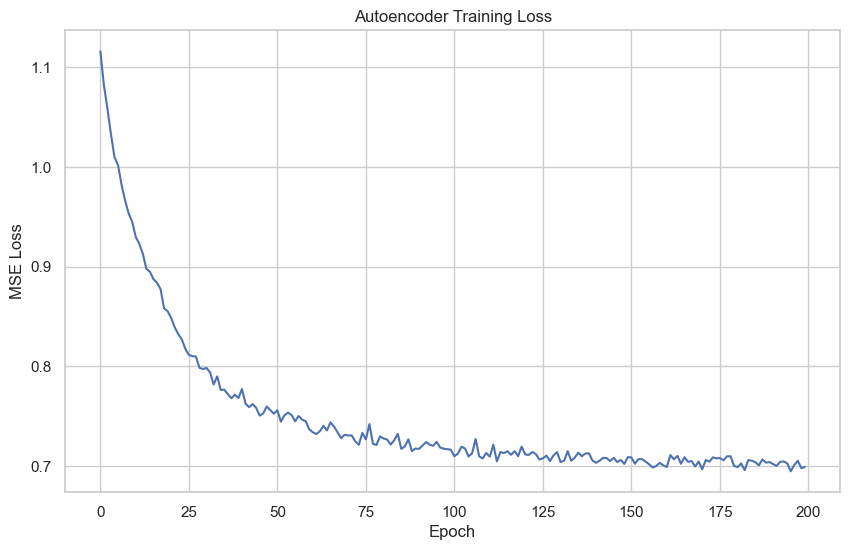


UNSUPERVISED ANOMALY DETECTION METHODS

Estimated contamination from cross-validation set: 0.5756
Using capped contamination value: 0.5000


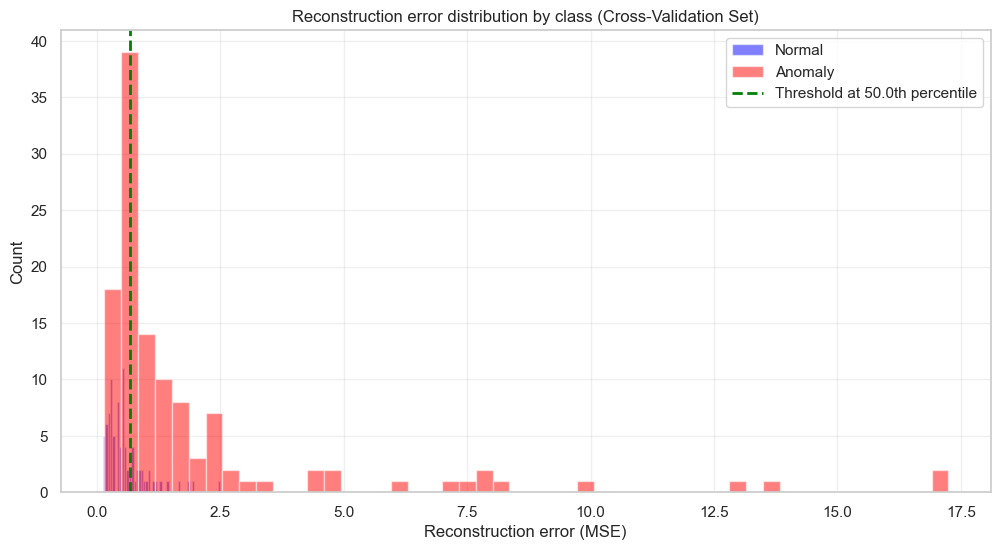

Threshold for anomaly detection: 0.665408


In [8]:
# Train the autoencoder
model = train_autoencoder(model, train_loader, num_epochs=200, patience=20)

# Function to compute reconstruction error
def compute_reconstruction_error(model, data_tensor):
    model.eval()
    with torch.no_grad():
        reconstructions = model(data_tensor)
        # Compute MSE for each sample
        mse = ((reconstructions - data_tensor) ** 2).mean(dim=1).cpu().numpy()
    return mse

# Compute reconstruction errors
train_errors = compute_reconstruction_error(model, X_train_tensor)
cv_errors = compute_reconstruction_error(model, X_cv_tensor)
test_errors = compute_reconstruction_error(model, X_test_tensor)

# Determine threshold for anomaly detection using cross-validation set
# We'll use the contamination rate from the cross-validation set
print("\n" + "=" * 50)
print("UNSUPERVISED ANOMALY DETECTION METHODS")
print("=" * 50)

# Calculate contamination from cross-validation set
raw_contamination = np.mean(y_cross_val)
print(f"\nEstimated contamination from cross-validation set: {raw_contamination:.4f}")

# Cap contamination for algorithms that have limits
contamination = min(raw_contamination, 0.5)
print(f"Using capped contamination value: {contamination:.4f}")

# Find the threshold that best separates normal and anomalous examples in the CV set
cv_errors_normal = cv_errors[y_cross_val == 0]
cv_errors_anomaly = cv_errors[y_cross_val == 1]

# Plot histogram of reconstruction errors by class
plt.figure(figsize=(12, 6))
plt.hist(cv_errors_normal, bins=50, alpha=0.5, label='Normal', color='blue')
plt.hist(cv_errors_anomaly, bins=50, alpha=0.5, label='Anomaly', color='red')
plt.axvline(x=np.percentile(cv_errors, 100 * (1 - contamination)),
            color='green', linestyle='dashed', linewidth=2,
            label=f'Threshold at {100 * (1 - contamination):.1f}th percentile')
plt.title('Reconstruction error distribution by class (Cross-Validation Set)')
plt.xlabel('Reconstruction error (MSE)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Set threshold at the percentile corresponding to the contamination rate
threshold = np.percentile(cv_errors, 100 * (1 - contamination))
print(f"Threshold for anomaly detection: {threshold:.6f}")

# Make predictions on test set
y_pred = (test_errors > threshold).astype(int)



### Evaluation metrics

 In addition to the usual metrics, we show the plot with the **reconstruction error** for each point in the test set.

- Each dot is a data point.
- Color indicates the true label:  
  - 🔵 Blue for **normal**  
  - 🔴 Red for **anomalies**
- The green dashed line is the **threshold** used to classify a point as anomalous.

What does this chart tell us?

- Samples **above the threshold** are predicted as anomalies
- Samples **below** are classified as normal
- We can directly spot:
  - **False positives**: blue dots above the line
  - **False negatives**: red dots below the line

This is a simple but effective diagnostic tool to evaluate the classifier's behavior **based on its internal logic** (reconstruction error).  
It's also a sanity check: are anomalies really harder to reconstruct?

<br>

---

<br>

### 📊 A note on visualizing results with PCA and latent space

After training the autoencoder, we extract the **internal (latent) representation** of the test set.  
This is the output of the encoder — a compressed and abstract version of each input.

To make it visible, we apply **PCA** to this latent space.

Why?

- The latent space has too many dimensions to visualize.
- PCA gives us the two principal directions where the model encodes most variation.
- We use one **latent-variable model (PCA)** to inspect another **latent-variable model (the autoencoder)**

> 🌀 Like in the movie *Inception*, this is a model **within** a model.  
> 🧠 We *dive into the mind of the Autoencoder* to see how it thinks —  
> not through raw inputs, but through how it compresses and reconstructs the world. In order to do that, we need PCA to simplify the situation.


We then:

- Color the points based on **true vs predicted anomalies**.
- Explore the **structure of the latent space**.
- Visualize **where the reconstruction error is high**, and how it affects anomaly decisions.

These plots are not just for show: they provide some **qualitative insight** into the model’s logic, blind spots, and failure modes.

<br>


Autoencoder performance:
Precision: 0.7257
Recall: 0.6891
F1 Score: 0.7069


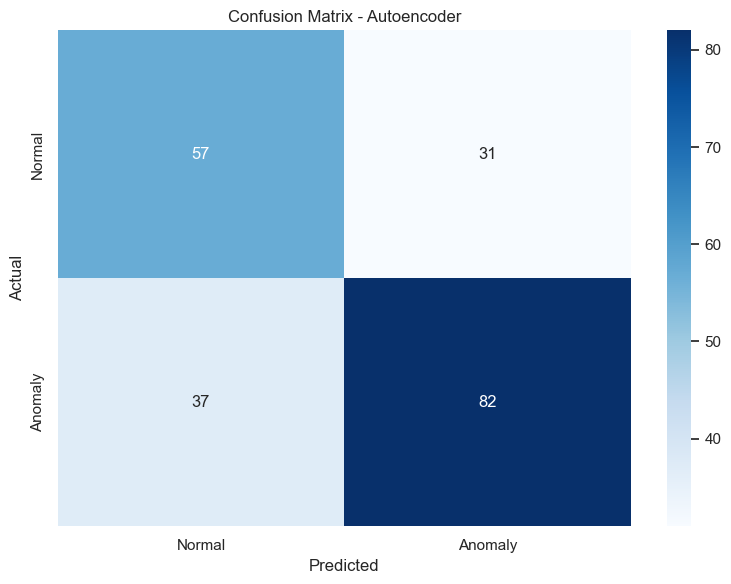

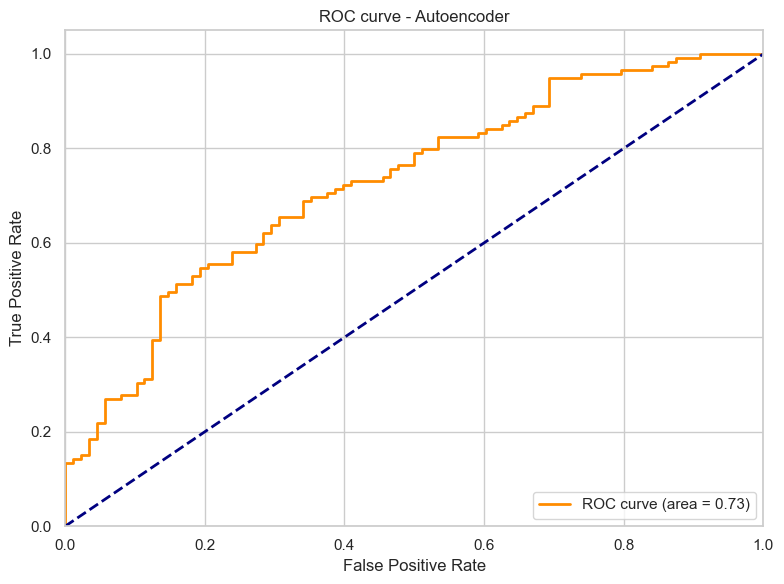

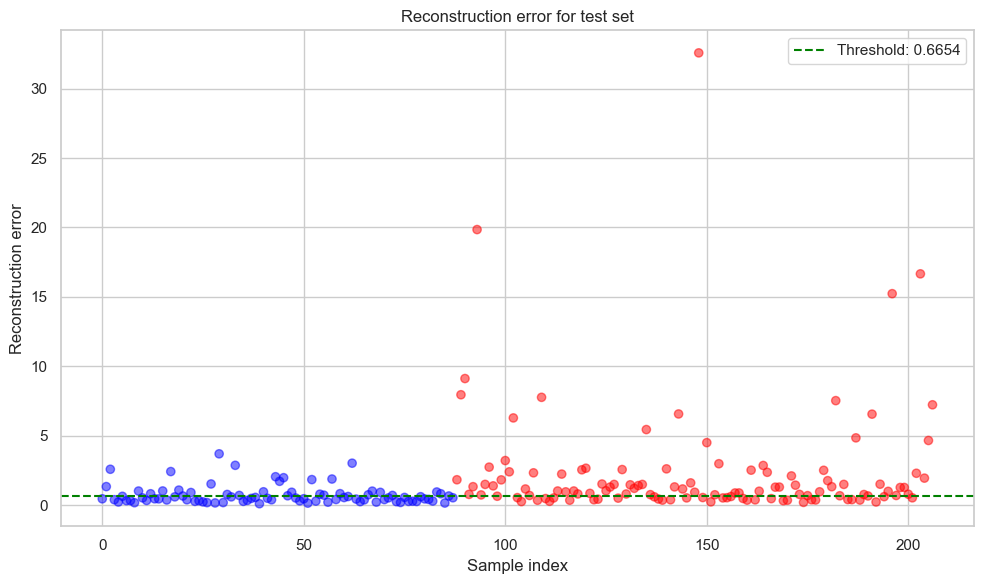

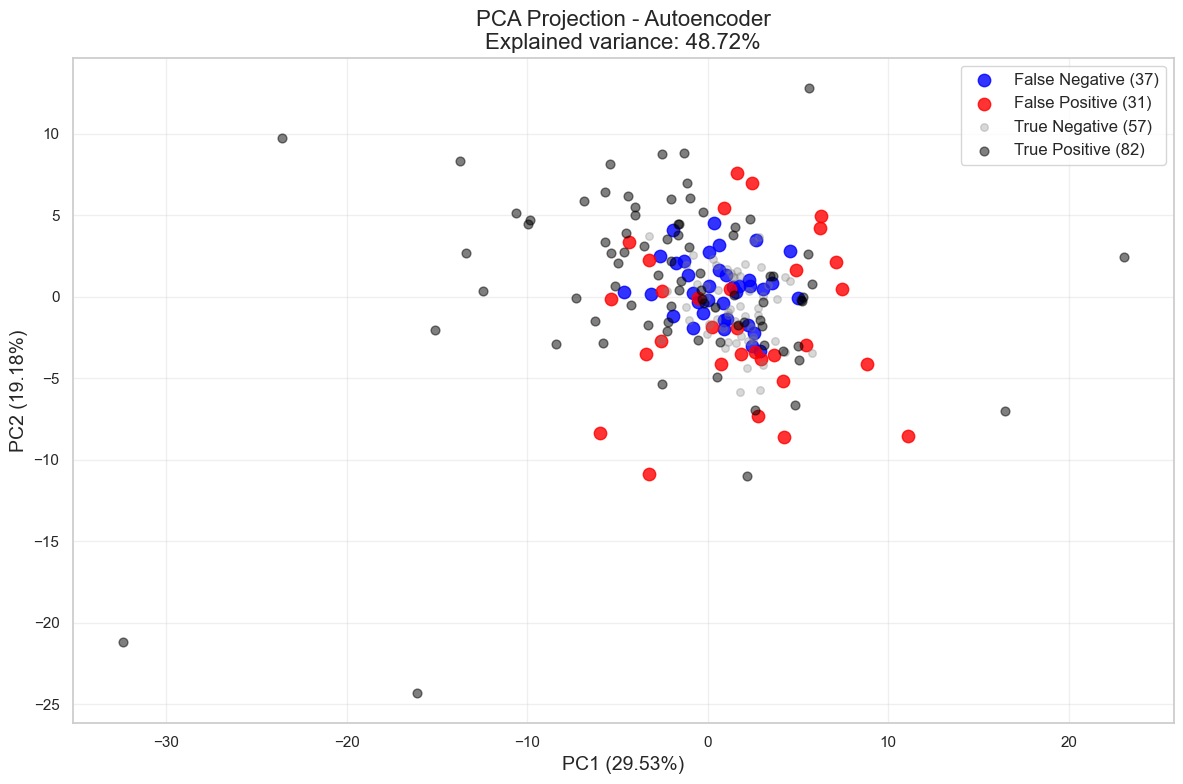

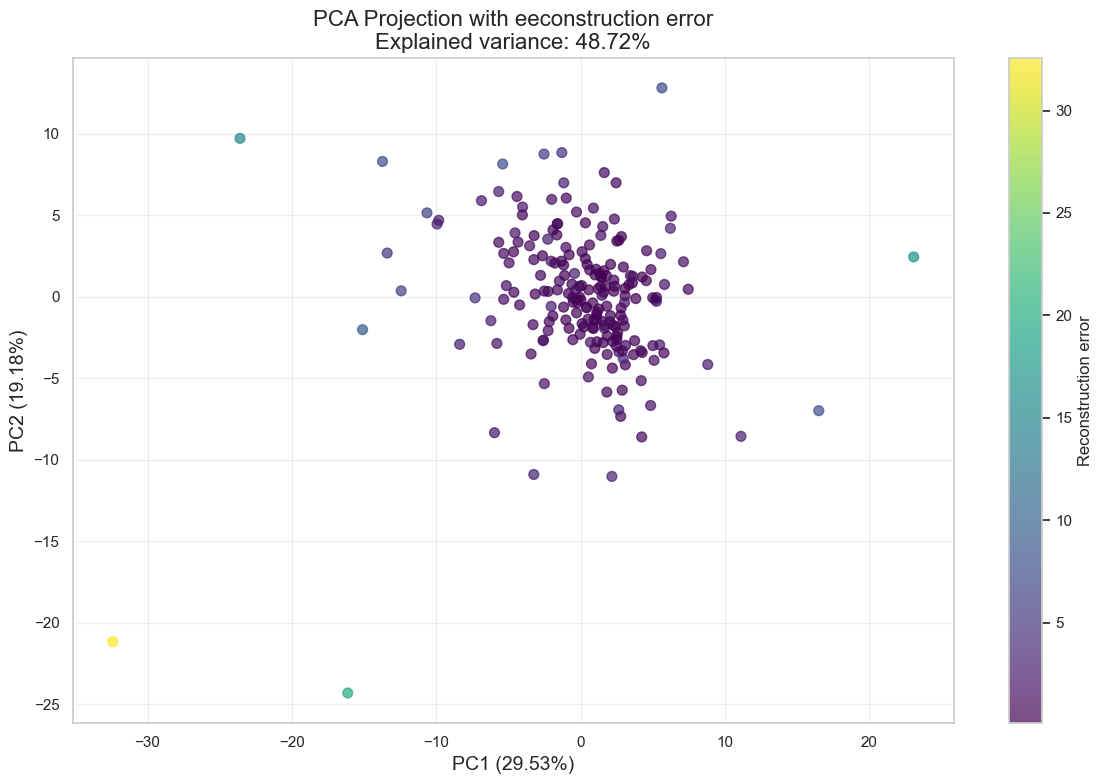

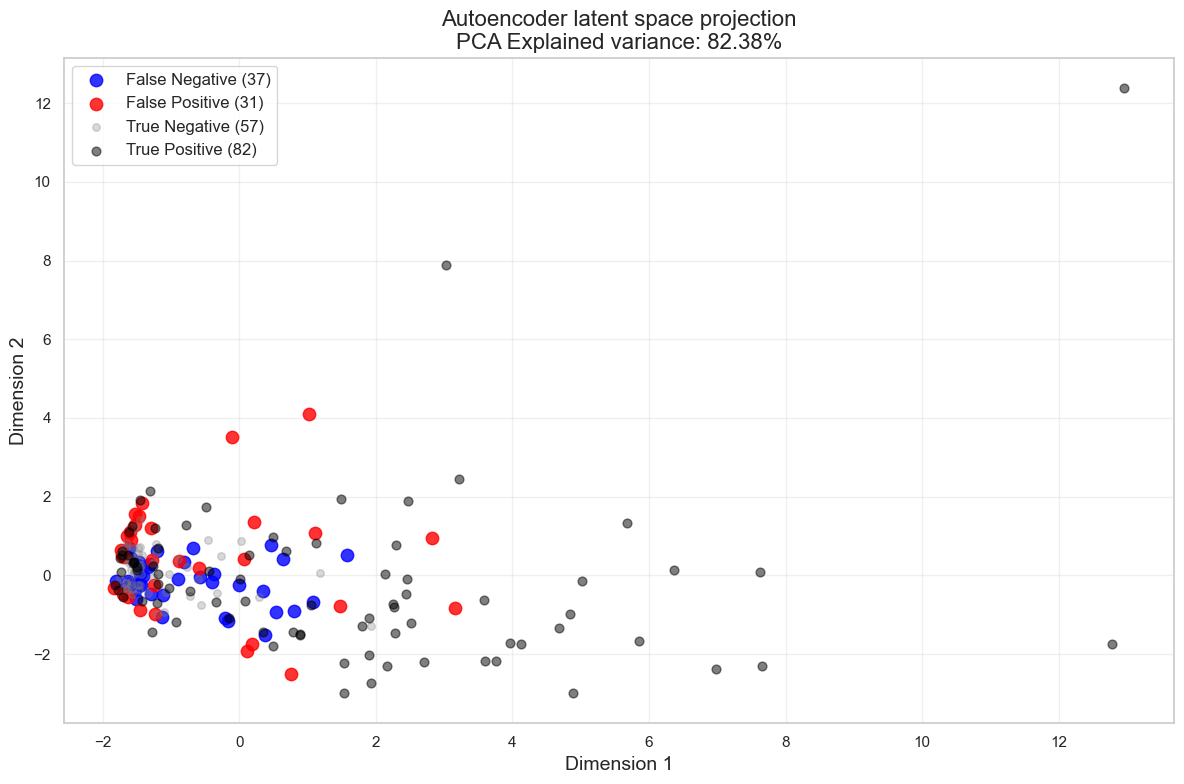

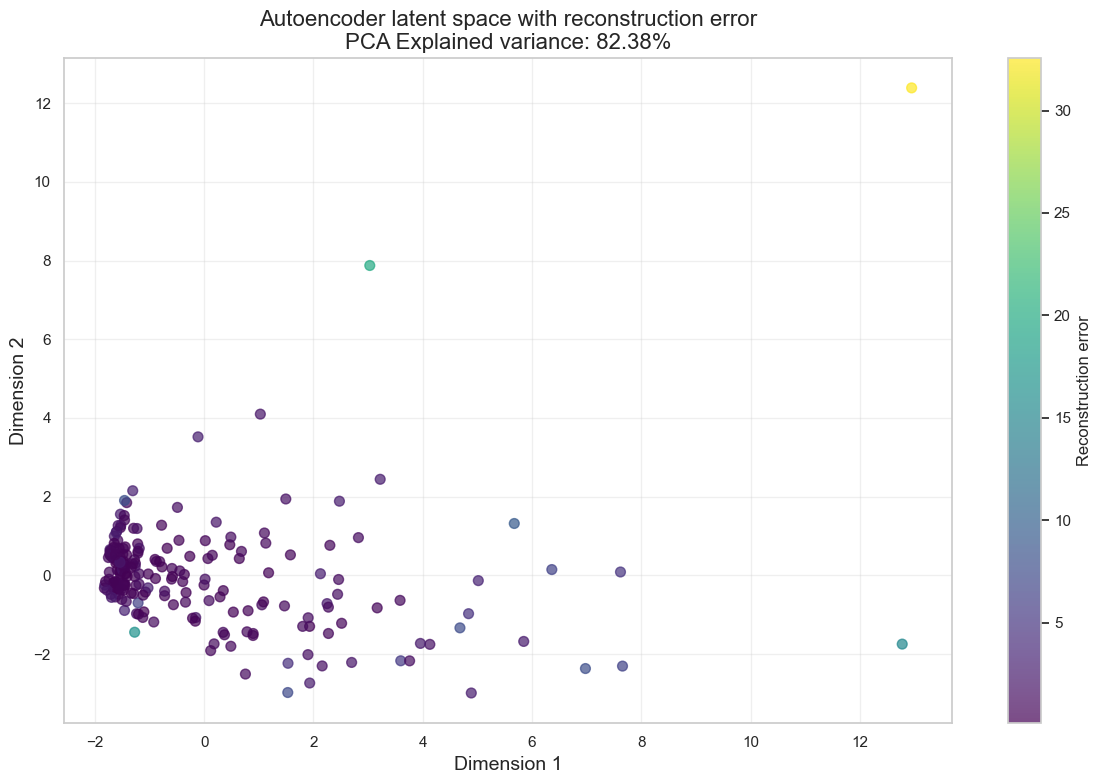


Performance comparison:
      Model  Precision   Recall  F1 Score
Autoencoder   0.725664 0.689076  0.706897


In [9]:
# Evaluate the autoencoder model
def evaluate_autoencoder(y_true, y_pred, reconstruction_errors, threshold):
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print("\nAutoencoder performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Autoencoder')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, reconstruction_errors)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve - Autoencoder')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

    # Visualize reconstruction error distribution
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(reconstruction_errors)),
                reconstruction_errors,
                c=['blue' if label == 0 else 'red' for label in y_true],
                alpha=0.5)
    plt.axhline(y=threshold, color='green', linestyle='--', label=f'Threshold: {threshold:.4f}')
    plt.title('Reconstruction error for test set')
    plt.xlabel('Sample index')
    plt.ylabel('Reconstruction error')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return precision, recall, f1, roc_auc


# Visualize in PCA space
def visualize_autoencoder_pca(X, y_true, y_pred, reconstruction_errors, threshold):
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame for plotting
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['Actual'] = y_true
    pca_df['Predicted'] = y_pred
    pca_df['Error'] = reconstruction_errors

    # Create classification categories
    pca_df['Category'] = 'Unknown'
    pca_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    pca_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    pca_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    pca_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Calculate explained variance
    explained_variance = pca.explained_variance_ratio_
    total_variance = sum(explained_variance)

    # Plot
    plt.figure(figsize=(12, 8))

    # Define colors and sizes
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}

    # Plot each category
    for category, group in pca_df.groupby('Category'):
        plt.scatter(group['PC1'], group['PC2'],
                    color=colors[category],
                    alpha=alphas[category],
                    s=sizes[category],
                    label=f"{category} ({len(group)})")

    plt.title(f'PCA Projection - Autoencoder\nExplained variance: {total_variance:.2%}', fontsize=16)
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot with reconstruction error as color intensity
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'],
                c=pca_df['Error'],
                cmap='viridis',
                alpha=0.7,
                s=50)
    plt.colorbar(scatter, label='Reconstruction error')
    plt.title(f'PCA Projection with eeconstruction error\nExplained variance: {total_variance:.2%}', fontsize=16)
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%})', fontsize=14)
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%})', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Visualize in latent space
    model.eval()
    with torch.no_grad():
        latent_vectors = model.encode(X_test_tensor).cpu().numpy()

    # Apply PCA if the latent space has more than 2 dimensions
    if latent_vectors.shape[1] > 2:
        pca_latent = PCA(n_components=2)
        latent_2d = pca_latent.fit_transform(latent_vectors)
        explained_var = pca_latent.explained_variance_ratio_
        total_var = sum(explained_var)
        title_suffix = f"\nPCA Explained variance: {total_var:.2%}"
    else:
        latent_2d = latent_vectors
        title_suffix = ""

    # Create DataFrame for latent space visualization
    latent_df = pd.DataFrame(latent_2d, columns=['Dim1', 'Dim2'])
    latent_df['Actual'] = y_test
    latent_df['Predicted'] = y_pred
    latent_df['Error'] = reconstruction_errors

    # Create classification categories
    latent_df['Category'] = 'Unknown'
    latent_df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
    latent_df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
    latent_df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
    latent_df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'

    # Plot in latent space by category
    plt.figure(figsize=(12, 8))
    for category, group in latent_df.groupby('Category'):
        plt.scatter(group['Dim1'], group['Dim2'],
                    color=colors[category],
                    alpha=alphas[category],
                    s=sizes[category],
                    label=f"{category} ({len(group)})")

    plt.title(f'Autoencoder latent space projection{title_suffix}', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot in latent space with reconstruction error as color
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(latent_df['Dim1'], latent_df['Dim2'],
                c=latent_df['Error'],
                cmap='viridis',
                alpha=0.7,
                s=50)
    plt.colorbar(scatter, label='Reconstruction error')
    plt.title(f'Autoencoder latent space with reconstruction error{title_suffix}', fontsize=16)
    plt.xlabel('Dimension 1', fontsize=14)
    plt.ylabel('Dimension 2', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


# Evaluate autoencoder performance
ae_metrics = evaluate_autoencoder(y_test, y_pred, test_errors, threshold)

# Visualize the autoencoder results
visualize_autoencoder_pca(X_test_scaled, y_test, y_pred, test_errors, threshold)

# Compare with previous models
# Add autoencoder results to the comparison DataFrame
results_df = pd.DataFrame([
    ("Autoencoder", ae_metrics[0], ae_metrics[1], ae_metrics[2])
], columns=['Model', 'Precision', 'Recall', 'F1 Score'])

# Print the results table
print("\nPerformance comparison:")
print(results_df.sort_values('F1 Score', ascending=False).to_string(index=False))


### 📈 Feature importance

We estimate feature importance by **zeroing out** each feature (one at a time) and measuring how much the **reconstruction error increases**.

This tells us which variables are most critical to the model's understanding of “normality.”  

> Useful for interpretability — especially in financial or operational risk settings.

<br>

C:\Users\andre\AppData\Local\Temp\ipykernel_11928\4164719277.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')


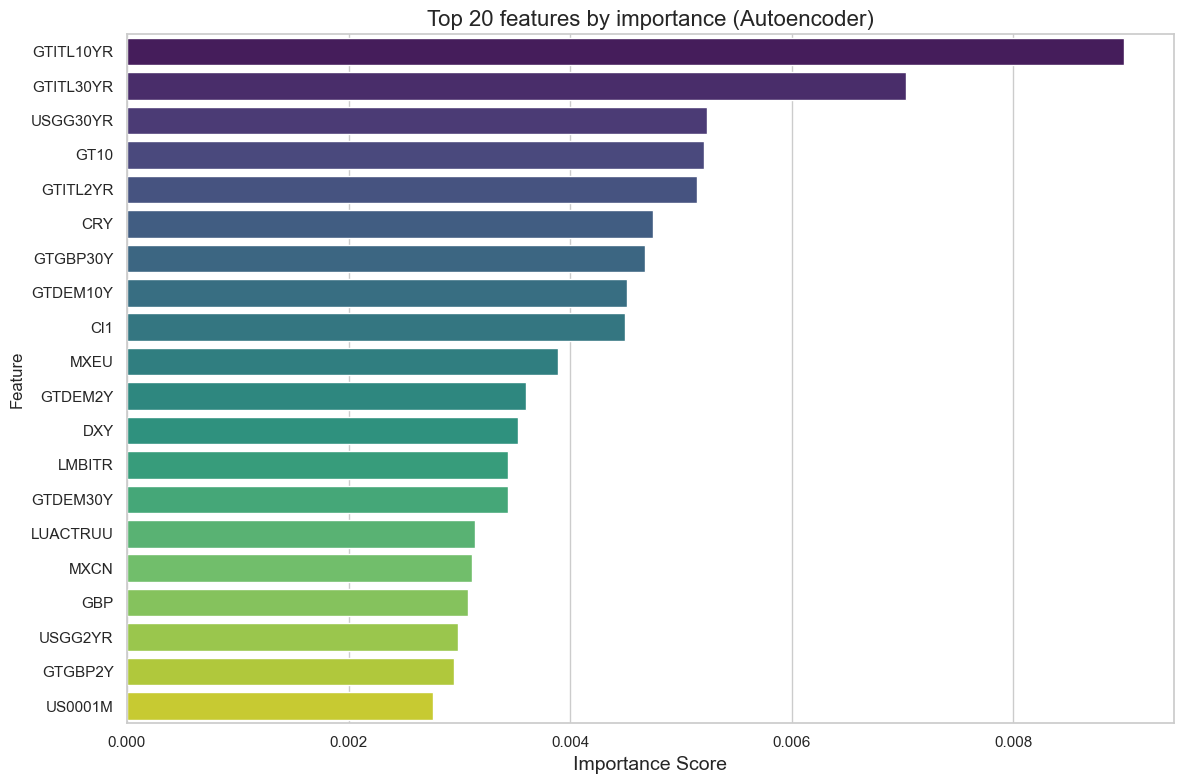


Top 10 most important features:
      Feature  Importance
31  GTITL10YR    0.008999
33  GTITL30YR    0.007035
39   USGG30YR    0.005238
24       GT10    0.005205
32   GTITL2YR    0.005143
1         CRY    0.004749
30   GTGBP30Y    0.004673
25   GTDEM10Y    0.004517
2         Cl1    0.004494
16       MXEU    0.003891


In [10]:
# Feature importance analysis using the autoencoder
def analyze_feature_importance(model, X_tensor, feature_names):
    """
    Analyze feature importance by measuring the impact of each feature on reconstruction error
    """
    model.eval()
    n_features = X_tensor.shape[1]
    importance_scores = []

    # Original reconstruction error
    with torch.no_grad():
        original_output = model(X_tensor)
        original_error = ((original_output - X_tensor) ** 2).mean(dim=0).cpu().numpy()

    # Measure impact of perturbing each feature
    for i in range(n_features):
        # Create a copy with the i-th feature perturbed
        perturbed_input = X_tensor.clone()
        perturbed_input[:, i] = torch.zeros_like(perturbed_input[:, i])

        with torch.no_grad():
            perturbed_output = model(perturbed_input)
            perturbed_error = ((perturbed_output - X_tensor) ** 2).mean(dim=0).cpu().numpy()

        # Importance is the increase in error when the feature is perturbed
        feature_importance = np.mean(perturbed_error - original_error)
        importance_scores.append(feature_importance)

    # Create DataFrame with feature importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance_scores
    })

    # Sort by importance
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Plot top 20 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
    plt.title('Top 20 features by importance (Autoencoder)', fontsize=16)
    plt.xlabel('Importance Score', fontsize=14)
    plt.tight_layout()
    plt.show()

    return importance_df

# Analyze feature importance
if 'stationary_df' in locals() and hasattr(stationary_df, 'columns'):
    feature_names = stationary_df.columns
    feature_importance = analyze_feature_importance(model, X_test_tensor, feature_names)
    print("\nTop 10 most important features:")
    print(feature_importance.head(10))
